<div style="background-color: lightgreen; padding: 10px;">
    <h2> Projeto | Análise Exploratória de Dados (EDA) - Estatística
</div>

### Aluno:
André R. Kuster | nº: 1116029

### Objetivo:

O objetivo deste projeto é aplicar os conhecimentos adquiridos ao longo da disciplina de **Estatística 1** em um contexto prático, utilizando um conjunto de dados, a ﬁm de praticar conceitos de estatística descritiva aprendidos em sala de aula, entender sobre as distribuições dos dados e extrair possíveis insights por meio de testes de hipóteses.

### Base de Dados:
Será utilizado conjunto de dados público de trajetos feitos por taxis de Nova York, termo popularmente conhecido como "corridas de taxi". A base contém informações sobre o trajeto (ponto de partida e de chegada), horário de partida e de chegada, quantidade de passageiros e também sobre as tarifas cobradas. Este projeto visa identificar as estatísticas descritivas dessas variáveis, entender as possíveis distribuições, e explorar algum teste de hipótese que possa evidenciar alguma relevância estatística ou responder a alguma pergunta de negócio.

A **imagem abaixo** mostra uma representação gráfica da cidade de Nova York, com cores simbolizando seus 5 bairros, que veremos mais adiante presentes na malha desses trajetos.

<img src="https://lovingnewyork.com.br/wp-content/uploads/2018/11/como-chegar-em-nova-york-bairros-1024x972.jpg" width="400"/>

### Ferramentas:
NumPy, Pandas, Matplotlib, Seaborn

### Referências:
- https://pandas.pydata.org
- https://seaborn.pydata.org/generated/seaborn.load_dataset.html
- https://github.com/mwaskom/seaborn-data
- https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Importação das bibliotecas
</div>

Inicialmente iremos importar o NumPy, Pandas e o Seaborn, utilizando respectivamente os alias ``np``, ``pd`` e ``sns``. 

Essas bibliotecas serão utilizados para manipular os dados que estudaremos a seguir.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Escolha da base de dados
</div>

Abaixo listaremos as bases de dados disponíveis na biblioteca ``Seaborn``:

In [15]:
datasets = sns.get_dataset_names()
print(datasets[:22])

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


Após consultarmos o Github de algumas dessas bases, optamos pela base ``taxis``, uma amostra da base originalmente disponível neste website:
- https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

A documentação nos mostra que a base possui as seguintes colunas:

| Coluna           | Descrição                                                                                              |
|------------------|--------------------------------------------------------------------------------------------------------|
| pickup           | Representa a data-hora em que o passageiro foi pego pelo táxi.                                  |
| dropoff          | Representa a data-hora em que o passageiro foi deixado pelo táxi.                                            |
| passengers       | Indica o número de passageiros no táxi durante a viagem.                                                |
| distance         | Mostra a distância percorrida durante a viagem de táxi.                                                 |
| fare             | O valor total da tarifa cobrada pelo táxi pela viagem.                                                  |
| tip              | Representa o valor da gorjeta dada pelo passageiro ao motorista (somente em cartão de crédito)          |
| tolls            | Refere-se ao valor dos pedágios pagos durante a viagem.                                                 |
| total            | Indica o custo total da viagem, incluindo a tarifa, gorjeta, pedágios e outras taxas.                   |
| color            | Indicar a cor do táxi (atualmente 2 tipos de taxis operam em NYC de acordo com a documentação).          |
| payment          | Indica o método de pagamento utilizado pelo passageiro para pagar a viagem.                              |
| pickup_zone      | Refere-se à zona ou área onde o passageiro foi pego pelo táxi.                                           |
| dropoff_zone     | Representa a zona ou área onde o passageiro foi deixado pelo táxi.                                       |
| pickup_borough   | Indica o bairro onde o passageiro foi pego pelo táxi.                                                   |
| dropoff_borough  | Representa o bairro onde o passageiro foi deixado pelo táxi.                                             |

Essas colunas fornecem informações detalhadas sobre as viagens, incluindo detalhes sobre tempo, localização, custo e pagamento. A seguir, estudaremos mais sobre a distribuição e sobre as estatísticas descritivas em buscar de padrões e possíveis perguntas de negócio que possam ser respondidas.

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Leitura da base de dados
</div>

Após o carregamento das bases de dados, iremos avançar para a etapa de leitura e para o discovery das informações apresentadas.

In [2]:
taxis = sns.load_dataset('taxis')
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


Inicialmente visualizamos as 5 primeiras observações da base, e também visualizamos o tamanho da base e as informações sobre as tipagens dos atributos:

In [17]:
taxis.shape

(6433, 14)

In [18]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

*Conclusão: São 6433 registros de viagens e 14 colunas disponíveis para explorarmos. Quanto aos tipos, existem ``datetime``, ``int`` para o número de passageiros, ``float`` para as distâncias e tarifas, e ``objects`` representando as variáveis em strings em nosso dataframe*

*Abaixo apresentamos uma tabela contendo o sumário com o nome das variáveis, seus tipos e classificações:*

| Nome da Variável | Tipo      | Classificação         |
|------------------|-----------|-----------------------|
| pickup           | datetime  | Quantitativa Contínua / Qualitativa Ordinal |
| dropoff          | datetime  | Quantitativa Contínua / Qualitativa Ordinal |
| passengers       | int       | Quantitativa Discreta |
| distance         | float     | Quantitativa Contínia |
| fare             | float     | Quantitativa Contínia |
| tip              | float     | Quantitativa Contínia |
| tolls            | float     | Quantitativa Contínia |
| total            | float     | Quantitativa Contínia |
| color            | str       | Qualitativa Nominal   |
| payment          | str       | Qualitativa Nominal   |
| pickup_zone      | str       | Qualitativa Nominal   |
| dropoff_zone     | str       | Qualitativa Nominal   |
| pickup_borough   | str       | Qualitativa Nominal   |
| dropoff_borough  | str       | Qualitativa Nominal   |

---
Investigaremos também se há a presença de ``missing values``, ou seja, valores faltantes em alguma das colunas de nossa base:

In [19]:
taxis.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

*Conclusão: De fato existem colunas onde até 45 observações apresentam valores faltantes*

---
Por meio das funções ``min`` e ``max`` iremos descobrir quantos dias compreendem as viagens disponíveis nessa base de dados:

In [35]:
taxis["pickup"].min()

Timestamp('2019-02-28 23:29:03')

In [36]:
taxis["pickup"].max()

Timestamp('2019-03-31 23:43:45')

In [5]:
taxis["pickup"].min() - taxis["pickup"].max()

Timedelta('-32 days +23:45:18')

*Conclusão: As dados são de viagens que ocorreram entre o dia 28 de fevereiro de 2019 e 31 de março do mesmo ano.*

---
Agora iremos explorar o conteúdo da variável ``passengers`` e suas tabelas de frequências absolutas e relativas:

In [11]:
taxis["passengers"].value_counts()

1    4678
2     876
5     277
3     243
6     153
4     110
0      96
Name: passengers, dtype: int64

In [12]:
taxis["passengers"].value_counts(normalize=True)

1    0.727188
2    0.136173
5    0.043059
3    0.037774
6    0.023784
4    0.017099
0    0.014923
Name: passengers, dtype: float64

*Conclusão: As viagens foram realizadas por somente 1 passageiro em 72% dos casos. Existem também casos com 2 a 6 passageiros. E vale ressaltar a presença de 96 ocorrências onde não houve a declaração de um passageiro presente (0 passageiros)*

---
Avançamos para a leitura de outras variáveis categóricas, como ``cor`` e ``forma de pagamento``:

In [29]:
taxis["color"].value_counts()

yellow    5451
green      982
Name: color, dtype: int64

In [20]:
taxis["color"].value_counts(normalize=True)

yellow    0.84735
green     0.15265
Name: color, dtype: float64

In [31]:
taxis["payment"].value_counts()

credit card    4577
cash           1812
Name: payment, dtype: int64

In [21]:
taxis["payment"].value_counts(normalize=True)

credit card    0.716388
cash           0.283612
Name: payment, dtype: float64

*Conclusão: As viagens foram realizadas em sua grande maioria por taxis amarelos (85% dos casos) e os pagamentos feitos na maior parte, em cartão de crédito (71% dos casos).*

---
Com relação aos bairros, desejamos explorar quais são as ocorrências seja por local de partida ou de destino:

In [33]:
taxis["pickup_borough"].value_counts()

Manhattan    5268
Queens        657
Brooklyn      383
Bronx          99
Name: pickup_borough, dtype: int64

In [34]:
taxis["dropoff_borough"].value_counts()

Manhattan        5206
Queens            542
Brooklyn          501
Bronx             137
Staten Island       2
Name: dropoff_borough, dtype: int64

A grande maioria dos trajetos foram feitos na ilha de Manhattan, seja como ponto de partida ou de chegada.

***Nota:*** Posteriormente podemos verificar se isso está relacionado ao fato da maior parte das viagens terem sido feitas por taxis da cor **amarela**.

<div style="background-color: lightgreen; padding: 10px;">
    <h2> Tratamento dos Dados
</div>

Etapa importante em toda análise de dados, o tratamento atende desde a tipagem de colunas, até a modificação e inclusão de novas variáveis em nossa base de dados.

Visto que possuímos a data-hora do embarque e do desembarque do passageiro, podemos calcular novas colunas como, por exemplo, a **duração total** da viagem, em minutos ou segundos.

Faremos uso da biblioteca ``datetime`` para isso.

In [20]:
from datetime import datetime

In [29]:
taxis['duration_delta'] = taxis["dropoff"] - taxis["pickup"]

In [31]:
taxis['duration_seconds'] = (taxis['dropoff'] - taxis['pickup']).dt.total_seconds()

In [33]:
taxis['duration_minutes'] = taxis['duration_seconds'] / 60

In [52]:
taxis.iloc[:, -3:].head()

,duration_delta,duration_seconds,duration_minutes
0,0 days 00:06:15,375.0,6.250000
1,0 days 00:07:05,425.0,7.083333
2,0 days 00:07:24,444.0,7.400000
3,0 days 00:25:52,1552.0,25.866667
4,0 days 00:09:32,572.0,9.533333


<div style="background-color: lightgreen; padding: 10px;">
    <h2>  Análise Exploratória Univariada
</div>

Passadas as etapas anteriores, avançamos para a análise univariada. Nesse momento desejamos analisar de forma mais aprofundada a distribuição dos dados de cada uma das variáveis separadamente.

<div style="background-color: lightgray; padding: 10px;">
    <h3>  Passageiros:
</div>

Um primeiro assunto a ser analisado é sobre os **passageiros**:

- Quais são as estatísticas descritivas dessa variável?
- Como os dados estão distribuídos?

In [3]:
taxis['passengers'].describe()

count    6433.000000
mean        1.539251
std         1.203768
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: passengers, dtype: float64

In [4]:
taxis['passengers'].var()

1.4490577096640629

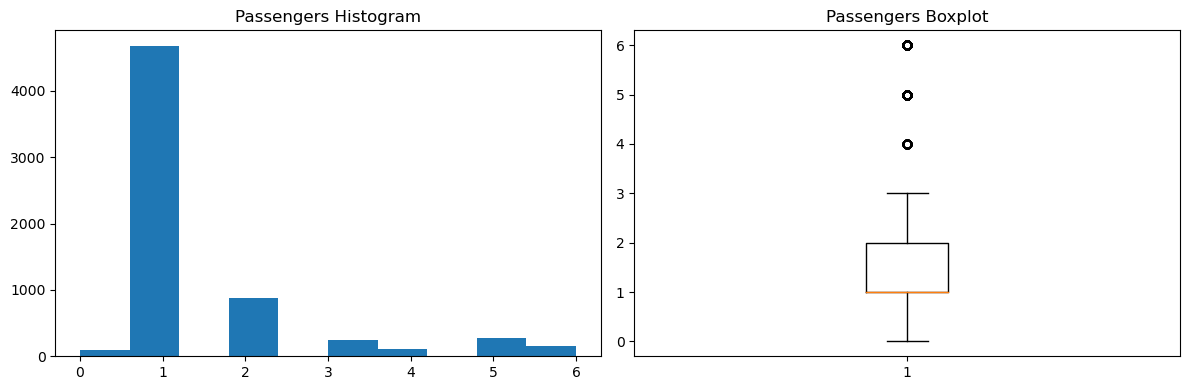

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Histograma
axs[0].hist(taxis['passengers'])
axs[0].set_title('Passengers Histogram')

# Box Plot
axs[1].boxplot(taxis['passengers'])
axs[1].set_title('Passengers Boxplot')

plt.tight_layout()
plt.show()

*Conclusão: Como vimos na leitura da tabela de frequências, auxiliada pelo gráfico de histograma, a maior parte dos trajetos é feito com 1 passageiro. A média de passageiros por trajeto é de 1.53, com desvio padrão de 1.20. <br>
Ao utilizarmos o gráfico box plot, apesar de os dados **não** mostrarem ser de uma distribuição normal, as observações com 4, 5 e 6 passageiros foram classificadas como outliers. Entretanto seria necessário atestar sua normalidade para poder afirmar isso com o uso do boxplot.*

<div style="background-color: lightgray; padding: 10px;">
    <h3>  Duração do trajeto:
</div>

Agora desejamos entender melhor sobre a nova variável que criamos **duração do trajeto**:

- Quais são as estatísticas descritivas dessa variável? Qual o valor mediano?
- 75% dos trajetos são feitos em até quanto tempo?
- Como os dados estão distribuídos?
- Existe assimetria na distribuição?

In [58]:
taxis['duration_minutes'].describe()

count    6433.000000
mean       14.349617
std        11.643892
min         0.000000
25%         6.500000
50%        10.900000
75%        18.516667
max       107.666667
Name: duration_minutes, dtype: float64

In [61]:
taxis['duration_minutes'].median()

10.9

In [59]:
taxis['duration_minutes'].var()

135.5802194148636

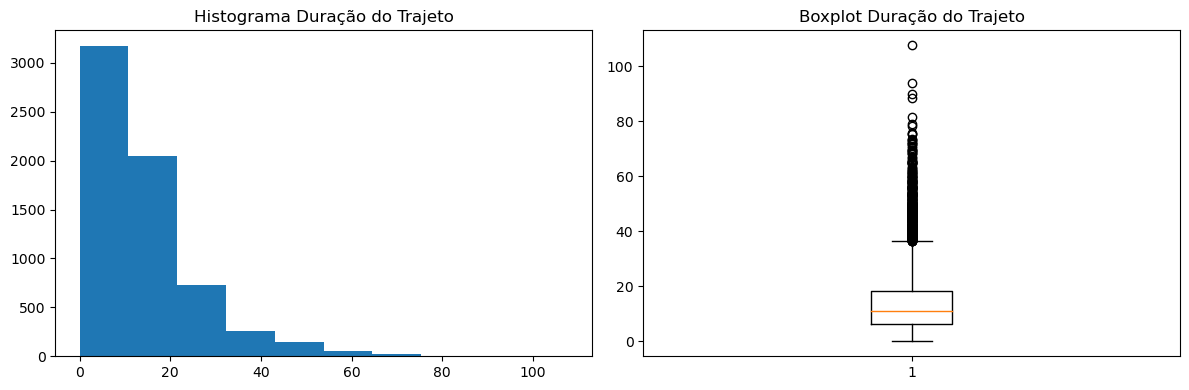

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Histograma
axs[0].hist(taxis['duration_minutes'])
axs[0].set_title('Histograma Duração do Trajeto')

# Box Plot
axs[1].boxplot(taxis['duration_minutes'])
axs[1].set_title('Boxplot Duração do Trajeto')

plt.tight_layout()
plt.show()

In [115]:
# avaliando a assimetria
taxis['duration_minutes'].skew()

2.0024117434553625

In [63]:
# algum teste para verificar em que distribuição ela se enquadra?

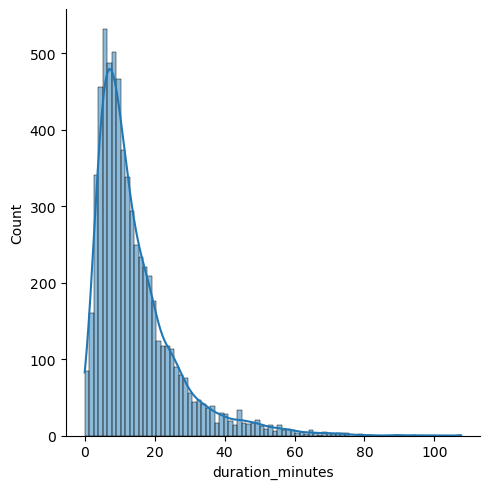

In [79]:
sns.displot(taxis['duration_minutes'], kde=True)

*Conclusão: escrever aqui*

---
Investigação: 

In [85]:
taxis[taxis['duration_minutes'] == 0]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,duration_delta,duration_seconds,duration_minutes
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.0,72.0,0.0,0.0,72.0,yellow,NaN,East New York,NaN,Brooklyn,NaN,0 days,0.0,0.0
5493,2019-03-06 12:14:00,2019-03-06 12:14:00,1,0.0,10.0,0.0,0.0,10.0,green,credit card,NaN,NaN,NaN,NaN,0 days,0.0,0.0
5624,2019-03-11 14:04:50,2019-03-11 14:04:50,1,0.0,2.5,0.0,0.0,3.3,green,cash,NaN,NaN,NaN,NaN,0 days,0.0,0.0
5638,2019-03-13 12:22:00,2019-03-13 12:22:00,1,0.0,10.0,0.0,0.0,10.0,green,credit card,NaN,NaN,NaN,NaN,0 days,0.0,0.0
6083,2019-03-19 15:34:00,2019-03-19 15:34:00,1,0.0,5.0,0.0,0.0,5.0,green,credit card,NaN,NaN,NaN,NaN,0 days,0.0,0.0
6356,2019-03-01 16:58:23,2019-03-01 16:58:23,1,0.0,3.0,0.0,0.0,4.8,green,cash,Stuyvesant Heights,NaN,Brooklyn,NaN,0 days,0.0,0.0


*Conclusão: escrever aqui*

<div style="background-color: lightgray; padding: 10px;">
    <h3>  Distâncias:
</div>

Agora desejamos entender melhor sobre as **distâncias dos trajetos**:

- Qual a média das distâncias dos trajetos?
- Como os dados estão distribuídos?
- Os dados estão na distribuição normal?

In [68]:
taxis['distance'].describe()

count    6433.000000
mean        3.024617
std         3.827867
min         0.000000
25%         0.980000
50%         1.640000
75%         3.210000
max        36.700000
Name: distance, dtype: float64

In [69]:
taxis['distance'].var()

14.652565777434717

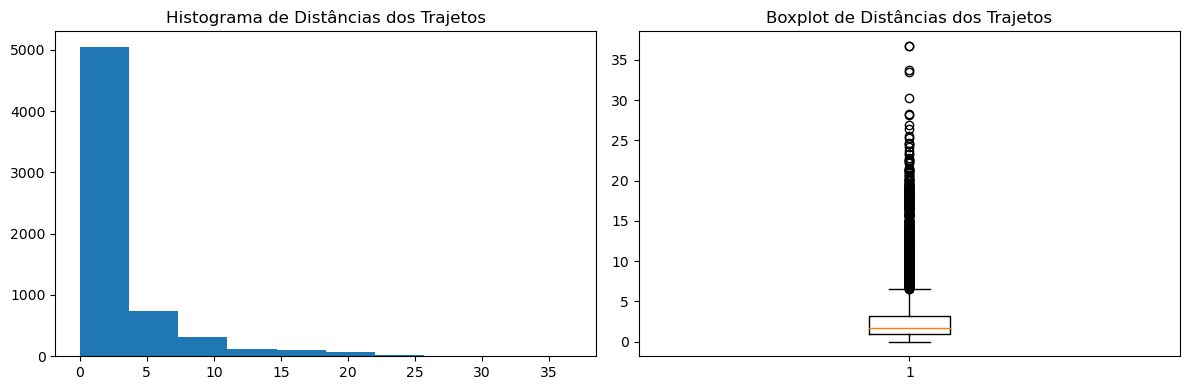

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Histograma
axs[0].hist(taxis['distance'])
axs[0].set_title('Histograma de Distâncias dos Trajetos')

# Box Plot
axs[1].boxplot(taxis['distance'])
axs[1].set_title('Boxplot de Distâncias dos Trajetos')

plt.tight_layout()
plt.show()

In [116]:
# avaliando a assimetria
taxis['distance'].skew()

3.0082057890318215

In [63]:
# algum teste para verificar em que distribuição ela se enquadra?

*Conclusão: escrever aqui*

<div style="background-color: lightgray; padding: 10px;">
    <h3>  Tarifa da Corrida:
</div>

Agora vamos explorar os dados das **tarifas das corridas**:

- Qual o valor médio das tarifas pagas?
- Como os dados estão distribuídos?
- Os dados estão na distribuição normal?

In [71]:
taxis['fare'].describe()

count    6433.000000
mean       13.091073
std        11.551804
min         1.000000
25%         6.500000
50%         9.500000
75%        15.000000
max       150.000000
Name: fare, dtype: float64

In [72]:
taxis['fare'].var()

133.4441818095617

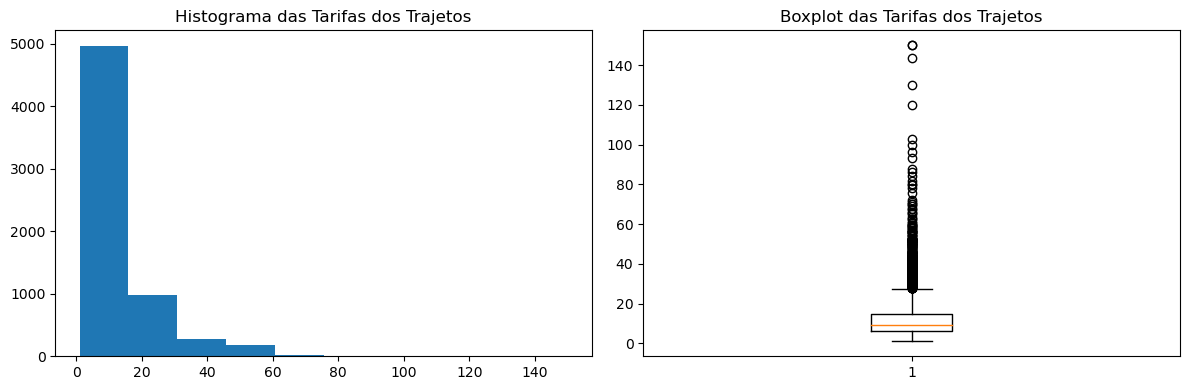

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Histograma
axs[0].hist(taxis['fare'])
axs[0].set_title('Histograma das Tarifas dos Trajetos')

# Box Plot
axs[1].boxplot(taxis['fare'])
axs[1].set_title('Boxplot das Tarifas dos Trajetos')

plt.tight_layout()
plt.show()

In [117]:
# avaliando a assimetria
taxis['fare'].skew()

3.217462794607763

In [63]:
# algum teste para verificar em que distribuição ela se enquadra?

*Conclusão: escrever aqui*

<div style="background-color: lightgreen; padding: 10px;">
    <h2>  Análise Exploratória Multivariada
</div>

Até o momento fizemos análises univariadas, explorando uma variável de cada vez.

Agora iremos explorar a relação entre duas ou mais variáveis. E para isso, existe um conjunto de métricas que podemos explorar como a **correlação** e a **covariância**.

<div style="background-color: lightgray; padding: 10px;">
    <h3>  Correlações:
</div>

Nesse primeiro momento iremos calcular a correlação entre as variáveis quantitativas para entender como elas estão correlacionadas:

In [108]:
corr = taxis[['passengers','distance','duration_minutes', 'fare', 'tip', 'tolls']].corr(method='spearman').round(2)
corr

,passengers,distance,duration_minutes,fare,tip,tolls
passengers,1.00,0.01,0.01,0.00,0.03,-0.01
distance,0.01,1.00,0.87,0.93,0.29,0.36
duration_minutes,0.01,0.87,1.00,0.95,0.29,0.33
fare,0.00,0.93,0.95,1.00,0.31,0.37
tip,0.03,0.29,0.29,0.31,1.00,0.17
tolls,-0.01,0.36,0.33,0.37,0.17,1.00


<Axes: >

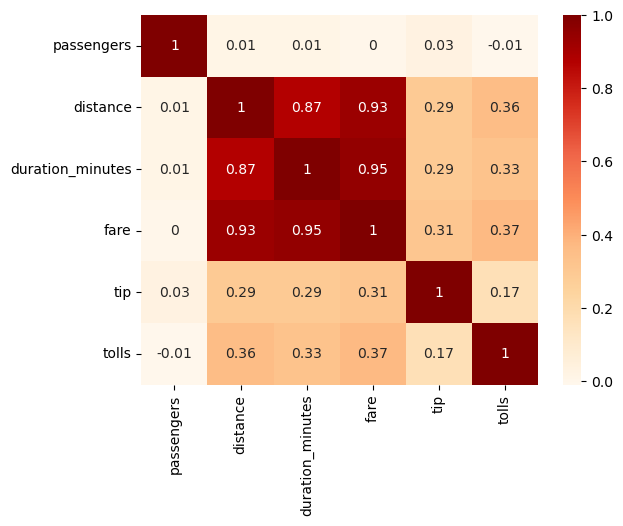

In [109]:
sns.heatmap(corr,annot=True,cmap="OrRd")

*Conclusão: escrever aqui*

Recapitulativo do conteúdo aprendido sobre Correlações Lineares:

<br>
<img src="https://www.mathsisfun.com/data/images/correlation-examples.svg" width=700>
<br>

Ilustração da diferença entre correlações **lineares** e **não lineares**:
<br>
<img src="https://miro.medium.com/max/1414/1*ZMwog-_YcD0qBHc9_1T1-w.png" width=700>
<br>

<div style="background-color: lightgray; padding: 10px;">
    <h3>  Covariância:
</div>

A covariância calcula a medida do grau de interdependência (ou inter-relação) entre as variáveis, portanto, queremos entender quais variáveis possuem alta covariância entre si, e quais apresentam maior independência entre si.

*escrever aqui*

In [75]:
taxis[['distance','duration_minutes']].cov()

,distance,duration_minutes
distance,14.652566,36.607309
duration_minutes,36.607309,135.580219


*escrever aqui*

In [77]:
taxis[['distance', 'fare']].cov()

,distance,fare
distance,14.652566,40.686031
fare,40.686031,133.444182


*escrever aqui*

In [78]:
taxis[['duration_minutes', 'fare']].cov()

,duration_minutes,fare
duration_minutes,135.580219,114.071835
fare,114.071835,133.444182


*escrever aqui*

In [111]:
taxis[['passengers', 'fare']].cov()

,passengers,fare
passengers,1.449058,0.106199
fare,0.106199,133.444182


In [112]:
taxis.cov()

C:\Users\Andre\AppData\Local\Temp\ipykernel_20224\1347229870.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  taxis.cov()


,passengers,distance,fare,tip,tolls,total,duration_seconds,duration_minutes
passengers,1.449058,0.043365,0.106199,0.062190,-0.004946,0.261233,-3.646951,-0.060783
distance,0.043365,14.652566,40.686031,4.242005,3.441533,47.843057,2196.438514,36.607309
fare,0.106199,40.686031,133.444182,13.820539,9.961493,155.502375,6844.310124,114.071835
tip,0.062190,4.242005,13.820539,5.995444,1.433341,21.859332,663.260417,11.054340
tolls,-0.004946,3.441533,9.961493,1.433341,2.002982,13.357292,454.440084,7.574001
total,0.261233,47.843057,155.502375,21.859332,13.357292,190.869976,7902.989316,131.716489
duration_seconds,-3.646951,2196.438514,6844.310124,663.260417,454.440084,7902.989316,488088.789894,8134.813165
duration_minutes,-0.060783,36.607309,114.071835,11.054340,7.574001,131.716489,8134.813165,135.580219


*Conclusão: escrever aqui*

<div style="background-color: lightgray; padding: 10px;">
    <h3>  Tabelas de Frequência:
</div>

In [123]:
cross_table = pd.crosstab(taxis['color'], taxis['pickup_borough'])
print(cross_table)

pickup_borough  Bronx  Brooklyn  Manhattan  Queens
color                                             
green              83       313        294     288
yellow             16        70       4974     369


In [128]:
cross_table = pd.crosstab(taxis['color'], taxis['pickup_borough'], normalize=True)*100
print(cross_table)

pickup_borough     Bronx  Brooklyn  Manhattan    Queens
color                                                  
green           1.295458  4.885282   4.588731  4.495084
yellow          0.249727  1.092555  77.633838  5.759326


In [127]:
taxis[['color', 'pickup_borough']].value_counts(normalize=True)*100

color   pickup_borough
yellow  Manhattan         77.633838
        Queens             5.759326
green   Brooklyn           4.885282
        Manhattan          4.588731
        Queens             4.495084
        Bronx              1.295458
yellow  Brooklyn           1.092555
        Bronx              0.249727
dtype: float64

*Conclusão: escrever aqui*

In [134]:
cross_table = pd.crosstab(taxis['color'], taxis['payment'])
print(cross_table)

payment  cash  credit card
color                     
green     400          577
yellow   1412         4000


In [139]:
green_taxis = taxis[taxis['color'] == 'green']

cross_table = pd.crosstab(green_taxis['color'], green_taxis['payment'], normalize=True)
print(cross_table)

payment      cash  credit card
color                         
green    0.409417     0.590583


In [140]:
yellow_taxis = taxis[taxis['color'] == 'yellow']

cross_table = pd.crosstab(yellow_taxis['color'], yellow_taxis['payment'], normalize=True)
print(cross_table)

payment      cash  credit card
color                         
yellow   0.260902     0.739098


*Conclusão: escrever aqui*

<div style="background-color: lightgreen; padding: 10px;">
    <h2>  Probabilidades
</div>

Nesta seção iremos aplicar os conceitos de probabilidade aprendidos em sala de aula.

Desejamos entender dado um determinado evento, qual a probabilidade de outro evento acontecer?

Pois bem, levantamos durante a etapa de leitura e exploração dos dados alguns **questionamentos**. 

Será que a **cor** do taxi influencia na probabilidade da ocorrência de determinado local de embarque em nossa amostra?

Queremos atestar:
- dado que o taxi é amarelo, qual a probabilidade de que o ponto de partida é a Ilha de Manhattan?
- caso o taxi seja verde, qual a probabilidade de que o ponto de partida é a Ilha de Manhattan?

---
##### Relembrando o conteúdo de Probabilidade Condicional:

Seja dois eventos A e B, a probabilidade condicional entre esses eventos é definada como:
    
$$ P(A | B) = \frac{P(A ∩ B)}{P(B)} $$

Lembrando que isso é possível se e somente se $ P(B) > 0$.

A forma mais comum de ler um problema de probabilidade condicional seria __"qual a probabilidade de ocorrer o evento A, dado que ocorreu o evento B"__.

---
- Inicialmente vamos calcular a probabilidade de ocorrer o pickoff_borough em ``Manhattan`` dado que o taxi é ``amarelo``:

In [155]:
# Probabilidade de um taxi ser amarelo -> P(Y) = S(Y)/S(W)
prob_yellow_taxi = len(taxis[taxis['color'] == 'yellow']) / len(taxis)
prob_yellow_taxi 

0.8473496036064044

In [156]:
# Probabilidade de pickoff_borough ser em Manhattan e o taxi ser amarelo -> P(M ∩ Y) = S(M ∩ Y)/ S(w)
prob_manhattan_and_yellow = (len(taxis[(taxis['color'] == 'yellow') & (taxis['pickup_borough'] == 'Manhattan')]) / len(taxis))
prob_manhattan_and_yellow

0.7732006839732629

In [163]:
# Probabilidade de pickoff_borough ser em Manhattan dado que o taxi é amarelo -> P(M|Y) = P(M ∩ Y) / P(Y) 
prob_manhattan_given_yellow = (prob_manhattan_and_yellow / prob_yellow_taxi )
prob_manhattan_given_yellow

0.9124931205283435

---
- Agora vamos calcular a probabilidade de ocorrer o pickoff_borough em ``Manhattan`` dado que o taxi é ``verde``:

In [168]:
# Probabilidade de um taxi ser verde -> P(G) = S(G)/S(w)
prob_green_taxi = len(taxis[taxis['color'] == 'green']) / len(taxis)
prob_green_taxi 

0.1526503963935955

In [169]:
# Probabilidade de pickoff_borough ser em Manhattan e o taxi ser verde -> P(M ∩ G) = S(M ∩ G)/ S(w)
prob_manhattan_and_green = (len(taxis[(taxis['color'] == 'green') & (taxis['pickup_borough'] == 'Manhattan')]) / len(taxis))
prob_manhattan_and_green

0.04570184983677911

In [171]:
# Probabilidade de pickoff_borough ser em Manhattan dado que o taxi é verde -> P(M|G) = P(M ∩ G) / P(Y) 
prob_manhattan_given_green = (prob_manhattan_and_green / prob_green_taxi )
prob_manhattan_given_green

0.2993890020366599

*Conclusão: De acordo com os resultados a probabilidade de o pickoff ter sido na ilha de Manhattan é **91%** nos casos em que o taxi é ``amarelo``, contra **30%** quando o taxi é ``verde``. 
<br>
Isso nos faz levantar possibilidades em que a frota de taxis amarelos pode ser maior, ou há um certo tipo de jurisdição ou preferência para que os taxis amarelos atuem com maior frequência na ilha do que os verdes. 
<br>
De toda forma, concluimos que há de fato uma certa influência na probabilidade de o pickoff ter sido em Manhattan dada a cor de um taxi.*

<div style="background-color: lightgreen; padding: 10px;">
    <h2>  Testes de Hipótese
</div>

Nesta seção iremos aplicar os conceitos de testes de hipótese afim de responder a alguns questionamentos.

- É verdade que taxis da cor amarela cobram mais caro em suas tarifas por distância percorrida do que os verdes?
- Viagens em que há pagamento de pedágio demoram mais que viagens sem pedágio?

<div style="background-color: lightgreen; padding: 10px;">
    <h2>  Conclusões
</div>

Este projeto buscou aplicar os conhecimentos de ``Estatística`` e ``Python`` adquiridos no módulo de **Estatística I** por meio da aplicação prática, utilizando dados que simulam a realidade.

Foi possível explorar um conjunto de dados com ``14 colunas`` que compõem uma amostra de observações de **viagens de taxi**.

Durante a etapa inicial, estivemos atentos com a documentação da base e realizamos o seu carregamento.

Durante a etapa de leitura, buscamos entender quais as informações a tabela apresentava em suas colunas.

Em seguida, durante a análise exploratória, buscamos entender melhor sobre a distribuições dos dados quantitativos e extrair suas estatísticas descritivas.

E por fim, aplicamos também os conceitos de probabilidade e testes de hipóteses para responder a alguns questionamentos de negócio.

Obrigado pela atenção de todos. 
Fiquem à vontade para apresentar melhorias nos códigos.